<a href="https://colab.research.google.com/github/EmeraldMath/Tensorflow_models/blob/master/tf_keras_regression_customized_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%tensorflow_version 2.x
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.17.5
pandas 0.25.3
sklearn 0.22.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [7]:
layer = tf.keras.layers.Dense(100)
#None means notdetermined number of sample
layer = tf.keras.layers.Dense(100, input_shape=(None, 5))
layer(tf.zeros([10,5]))

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [8]:
#layer.variables
layer.trainable_variables
help(layer)

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size

In [9]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [10]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7) #default test_size = 0.25
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [20]:
# tf.nn.softplus: log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x: tf.nn.softplus(x))
print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [21]:
# customized dense layer
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
      self.units = units
      self.activation = keras.layers.Activation(activation)
      super(CustomizedDenseLayer, self).__init__(**kwargs)

    def build(self, input_shape):
      """build the needed parameters kernel w and bias b"""
      # x * w + b x:input_shape: [None, a] output_shape [None, b]
      # w: [a, b]
      self.kernel = self.add_weight(name = 'kernel',
                                    shape = (input_shape[1], self.units),
                                    initializer = 'uniform',
                                    trainable = True)
      self.bias = self.add_weight(name = 'bias',
                                 shape = (self.units, ),
                                 initializer = 'zeros',
                                 trainable = True)
      super(CustomizedDenseLayer, self).build(input_shape)

    def call(self, x):
      """forward"""
      return  self.activation(x @ self.kernel + self.bias)

model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                       input_shape = x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus,
    # above equals to
    # keras.layers.Dense(1, activation='softplus')
    # or it also equals to
    # keras.layers.Dense(1), keras.layers.Activation('softplus'),                  
])
model.summary()
model.compile(loss='mse', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta = 1e-2)]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_8 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_9 (Cu (None, 1)                 31        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 97us/sample - loss: 1.1066 - val_loss: 0.6446
Epoch 2/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5588 - val_loss: 0.5529
Epoch 3/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4923 - val_loss: 0.4990
Epoch 4/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4654 - val_loss: 0.4869
Epoch 5/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4501 - val_loss: 0.4592
Epoch 6/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.4371 - val_loss: 0.4559
Epoch 7/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.4263 - val_loss: 0.4426
Epoch 8/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.4193 - val_loss: 0.4287
Epoch 9/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.411

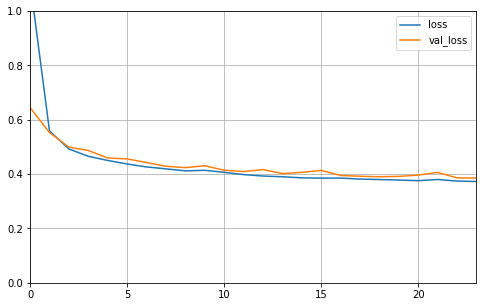

In [18]:
def plot_learning_curves(history):
  pd.DataFrame(history.history).plot(figsize = (8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()
plot_learning_curves(history)

In [19]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 31us/sample - loss: 0.3881


0.38812497124191403

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir callbacks